In this project, we would learn how to make a model detect fake currency with Machine Learning using binary classification.

# Import standard library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Reading data 

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data'
'/master/data_banknote_authentication.txt')
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


Naming each column

In [6]:
df.columns=['var', 'skew', 'curt','entr', 'auth']
df.head()

,var,skew,curt,entr,auth
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


Explanation about fields:
* (**Var**) The variance of the image transformed into wavelets
* (**Skew**) The asymmetry of the image transformed into wavelets
* (**curt**) Kurtosis of the image transformed into wavelets
* (**entr**) Image entropy
* (**auth**) authencity of currency, **0 for genuine and 1 for counterfeit**


# Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1371 non-null   float64
 1   skew    1371 non-null   float64
 2   curt    1371 non-null   float64
 3   entr    1371 non-null   float64
 4   auth    1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


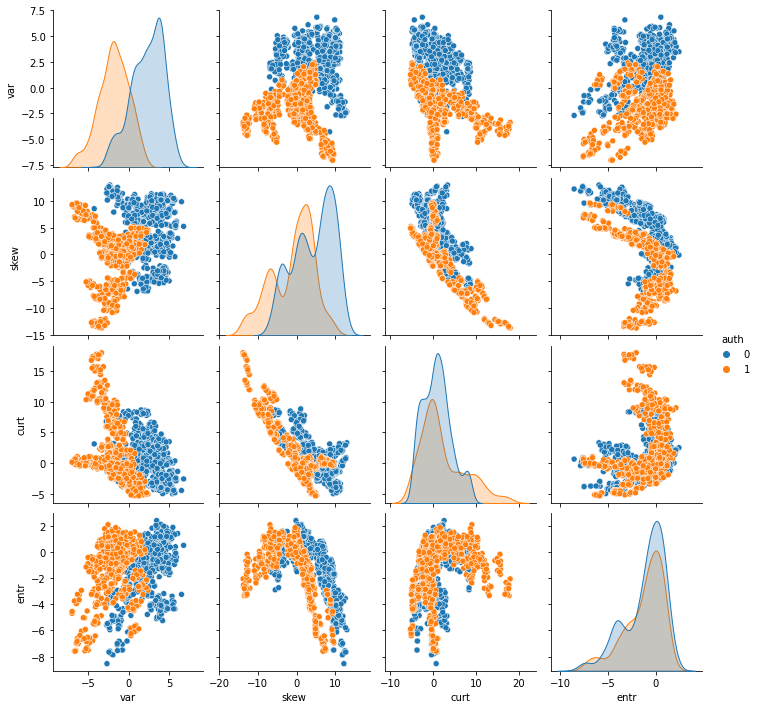

In [9]:
sns.pairplot(df, hue='auth')

check the balance of our targets, 'auth'

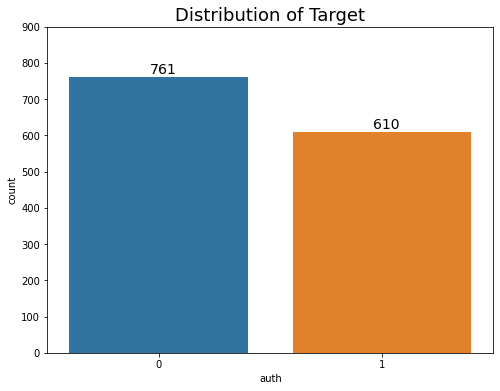

In [10]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['auth'])
target_count = df.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

# Data Processing
Since we use the binary classification, we need to balance our target perfectly by randomly drop a number of instances of the overrepresented target function. For simplicity, let's deleting 152 rows from actual banknotes (761-610+1)

In [11]:
noToDelete = target_count[0] - target_count[1]
df = df.sample(frac=1, random_state=42).sort_values(by='auth')
df = df[noToDelete:]
df['auth'].value_counts()

0    610
1    610
Name: auth, dtype: int64

Now we need to divide the data into training and test sets:

In [15]:
x = df.loc[:, df.columns != 'auth']
y = df.loc[:, df.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                        test_size=0.3, random_state=42)


# Logistic Regression

Now, we will train and test our model for fake currency detection by using the Logistic Regression Algorithm.

In [16]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [17]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [18]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            190              3
Act.Positive              1            172

 Accuracy = 98.91%


In [19]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.65259056 0.34740944]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
